In [1]:
import glob
from nilearn import plotting
import numpy as np
import pandas as pd
from nilearn.glm.second_level import SecondLevelModel

In [2]:
def grab_stat_files(dir:str, threshold:str):
    # Set directory containing the contrast files
    dir = dir
    # Get list of all .nii.gz files in the directory
    files = glob.glob(f'{dir}/*{threshold}.nii.gz')
    # Exclude files that contain 'bin' in their names
    files = [f for f in files if 'bin' not in f]
    # Separate files into HC and SCZ groups based on filename prefixes
    HC = []
    SCZ = []
    for f in files: 
        if f.split('/')[-1].startswith('0'):
            HC.append(f)
        if f.split('/')[-1].startswith('5'):
            SCZ.append(f)
    # Sort the lists to maintain consistent order
    return sorted(HC), sorted(SCZ)

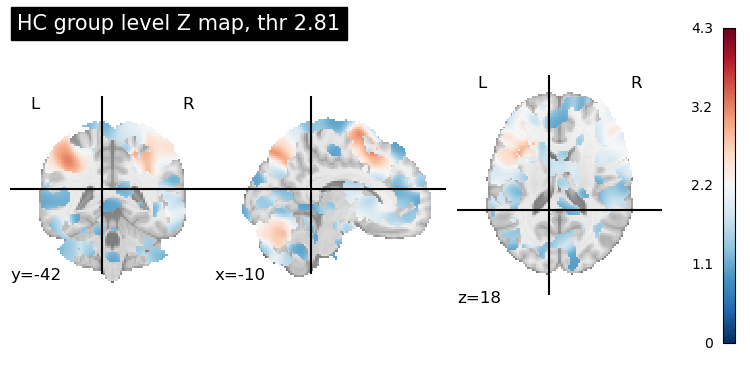

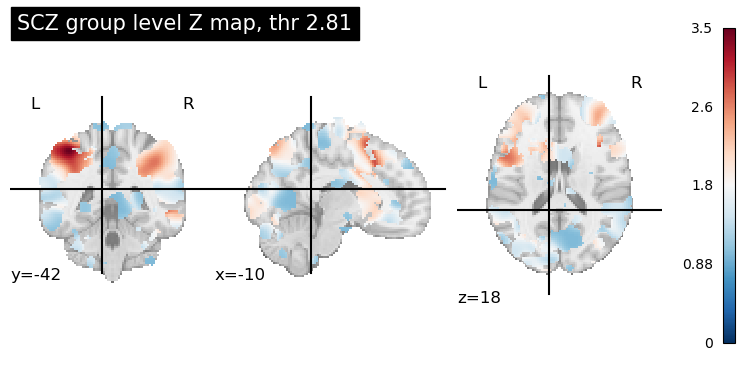

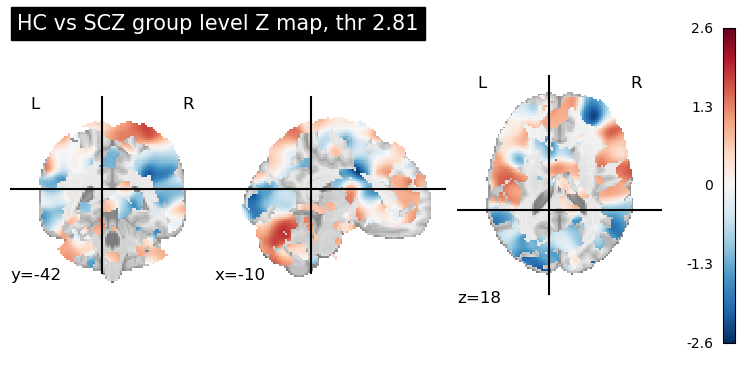

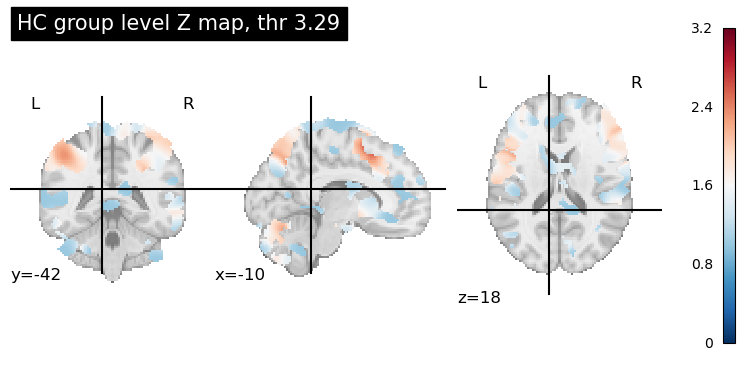

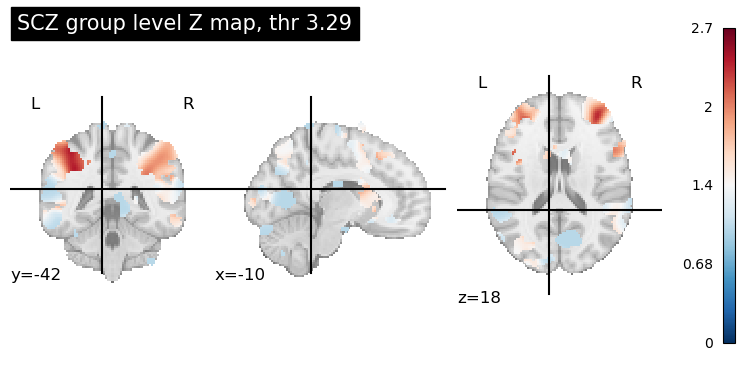

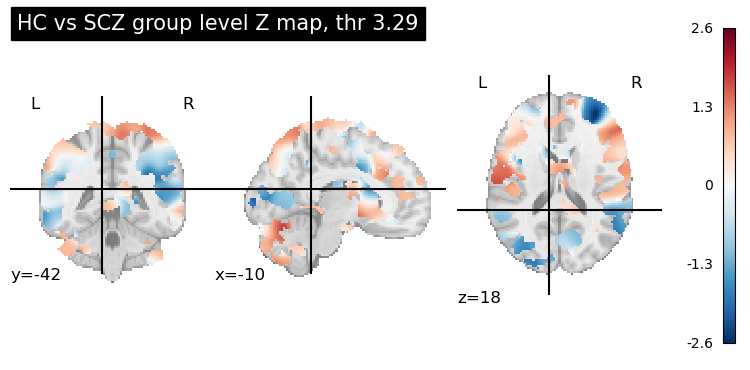

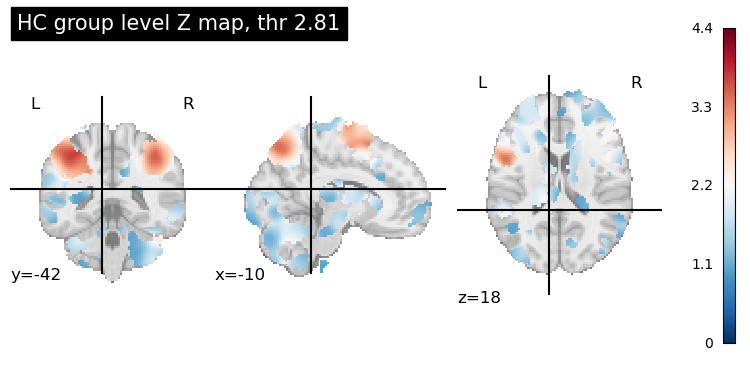

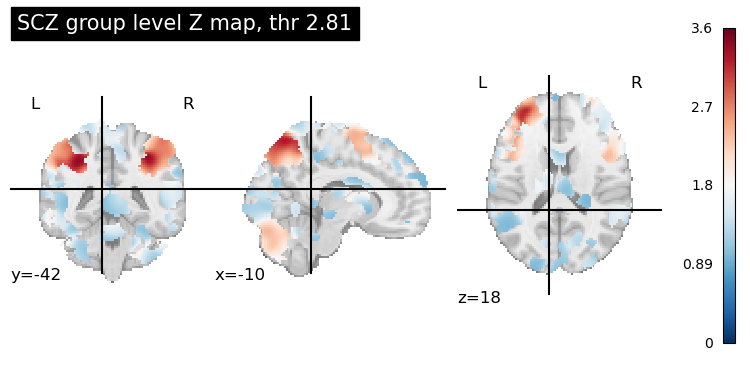

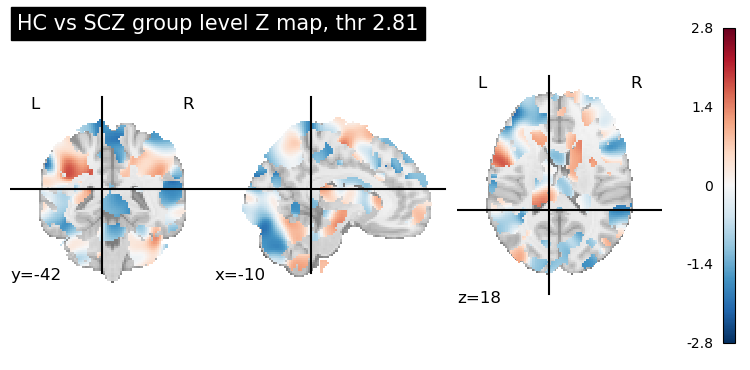

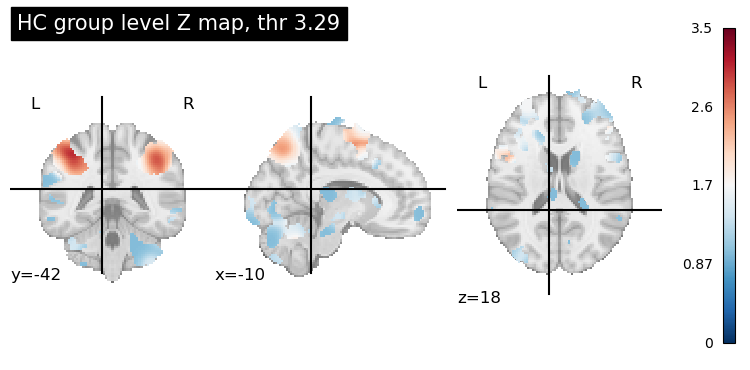

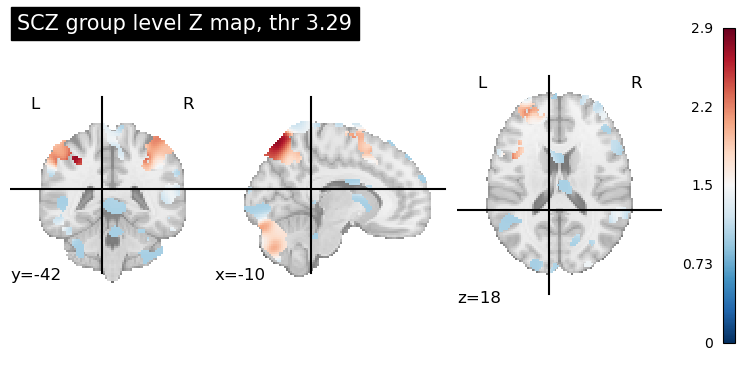

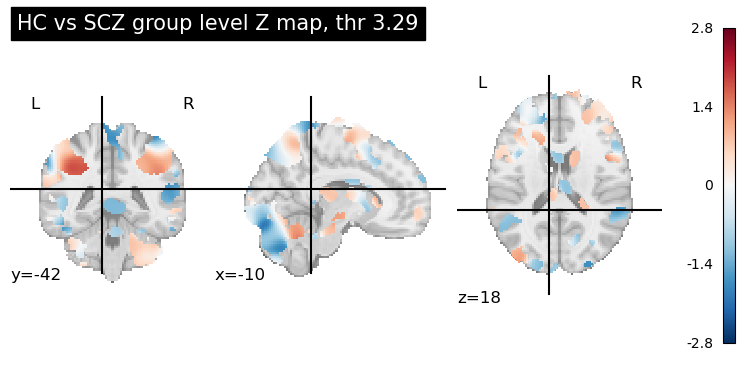

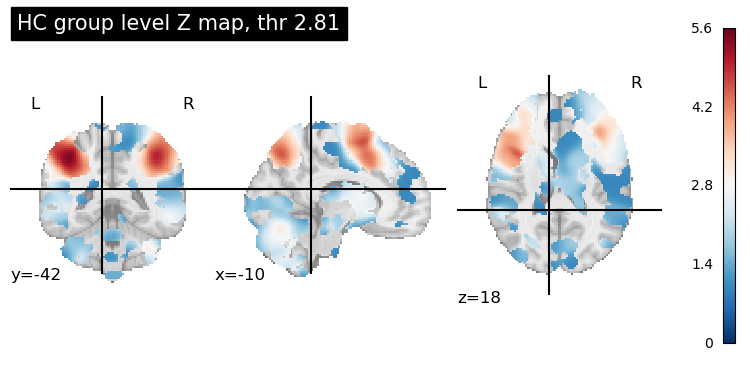

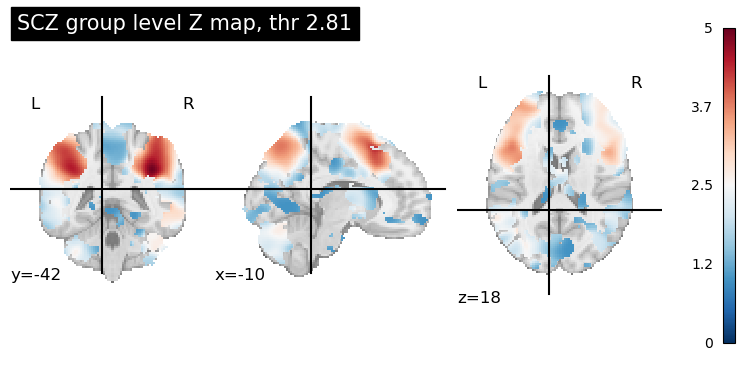

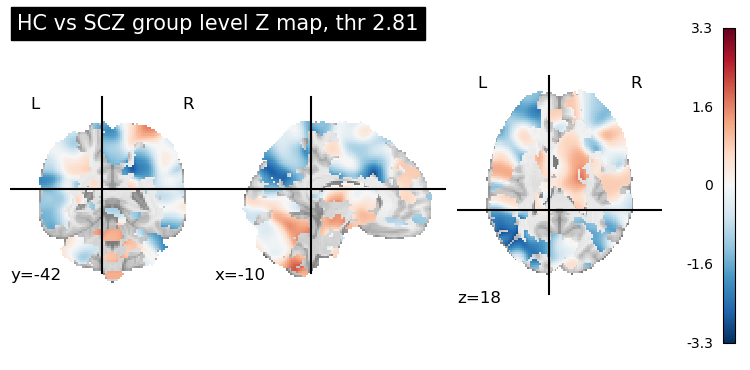

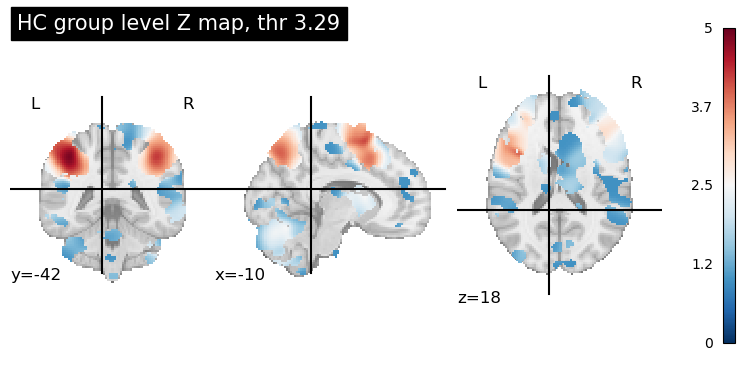

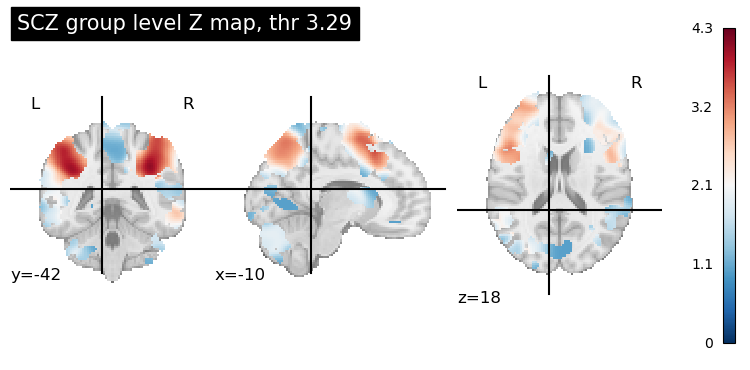

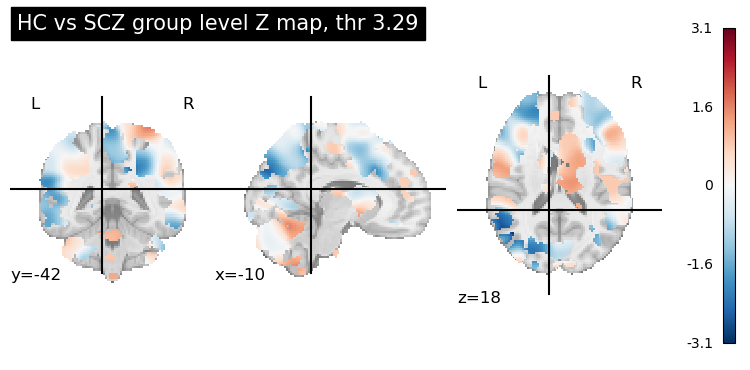

In [3]:
for c in ['contrast_1v0','contrast_2v1','contrast_2v0']:
    for thr in ['2.81','3.29']:
        thr_hc, thr_scz = grab_stat_files(f'/BICNAS2/tuominen/ANM_SCZ/anm_files/{c}', thr)
        
        # design matrices for current thresholded data
        design_matrix_HC = pd.DataFrame([1] * len(thr_hc), columns=["intercept"])
        design_matrix_SCZ = pd.DataFrame([1] * len(thr_scz), columns=["intercept"])
        group_effect = np.hstack(([1] * len(thr_hc), [0] * len(thr_scz)))
        design_matrix_group = pd.DataFrame(group_effect, columns=["HC vs SCZ"])
        design_matrix_group["intercept"] = 1

        # HC model
        model_hc = SecondLevelModel(smoothing_fwhm=12.0)
        model_hc = model_hc.fit(thr_hc, design_matrix=design_matrix_HC)
        z_map_hc = model_hc.compute_contrast("intercept", output_type="z_score")
        display1 = plotting.plot_stat_map(
            z_map_hc,
            threshold=0,
            display_mode="ortho",
            cut_coords=[-10,-42,18],
            title=f"HC group level Z map, thr {thr}",
        )
        display1.savefig(f'/BICNAS2/tuominen/ANM_SCZ/figs/{c}_HC_thr{thr}.png')
        # SCZ model
        model_scz = SecondLevelModel(smoothing_fwhm=12.0)
        model_scz = model_scz.fit(thr_scz, design_matrix=design_matrix_SCZ)
        z_map_scz = model_scz.compute_contrast("intercept", output_type="z_score")
        display2 = plotting.plot_stat_map(
            z_map_scz,
            threshold=0,
            display_mode="ortho",
            cut_coords=[-10,-42,18],
            title=f"SCZ group level Z map, thr {thr}",
        )
        display2.savefig(f'/BICNAS2/tuominen/ANM_SCZ/figs/{c}_SCZ_thr{thr}.png')
        # Group comparison model
        model_group = SecondLevelModel(smoothing_fwhm=12.0)
        model_group = model_group.fit(thr_hc + thr_scz, design_matrix=design_matrix_group)
        z_map_group = model_group.compute_contrast("HC vs SCZ", output_type="z_score")
        display3 = plotting.plot_stat_map(
            z_map_group,
            threshold=0,
            display_mode="ortho",
            cut_coords=[-10,-42,18],
            title=f"HC vs SCZ group level Z map, thr {thr}",
        )
        display3.savefig(f'/BICNAS2/tuominen/ANM_SCZ/figs/{c}_HC_vs_SCZ_thr{thr}.png')